### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read in File and Clean Data

In [6]:
# Read CSV
csv_path = Path('../Resources/crypto_data.csv')
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data

# Drop all columns cryptocurrency and data_priceUsd
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])

# # Drop missing values
crypto_data = crypto_data.dropna()
crypto_data.tail(50)

,cryptocurrency,data_priceUsd
data_date,,
2019-03-19,litecoin,59.607206
2019-03-20,litecoin,60.061846
2019-03-21,litecoin,59.667955
2019-03-22,litecoin,59.050415
2019-03-23,litecoin,60.553906
2019-03-24,litecoin,60.030341
2019-03-25,litecoin,59.709251
2019-03-26,litecoin,58.871417
2019-03-27,litecoin,60.860138


In [4]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3539 entries, 2017-05-10 to 2019-05-07
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cryptocurrency  3539 non-null   object 
 1   data_priceUsd   3539 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.9+ KB


### Group DataFrame and perform `count` aggregation

In [12]:
# Group by crypto data by cryptocurrency and perform count
single_group = crypto_data.groupby('cryptocurrency').count()
single_group

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame without aggregate function

In [13]:
# Group by crypto data by cryptocurrency
single_group = crypto_data.groupby('cryptocurrency').count()
single_group

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame by `cryptocurrency` and calculate the average `data_priceUsd`

In [14]:
# Calculate average data_priceUsd for each crypto
crypto_mean = crypto_data.groupby('cryptocurrency')['data_priceUsd'].mean()
crypto_mean

cryptocurrency
bitcoin         6323.018445
bitcoin-cash     733.997564
ethereum         369.037426
litecoin          85.618264
ripple             0.475986
Name: data_priceUsd, dtype: float64

### Group by more than one column and calculate count

In [18]:
# Group by more than one column
rounded_crypto_data = crypto_data.round({'data_priceUsd' : 2})
rounded_crypto_data.head()

multi_crypto_mean = rounded_crypto_data.groupby(['cryptocurrency','data_priceUsd']).count()
multi_crypto_mean

Empty DataFrame
Columns: []
Index: [(bitcoin, 1714.96), (bitcoin, 1742.72), (bitcoin, 1743.72), (bitcoin, 1776.44), (bitcoin, 1789.28), (bitcoin, 1802.04), (bitcoin, 1828.68), (bitcoin, 1840.5), (bitcoin, 1932.28), (bitcoin, 1958.25), (bitcoin, 1988.96), (bitcoin, 2041.04), (bitcoin, 2046.89), (bitcoin, 2071.96), (bitcoin, 2096.07), (bitcoin, 2132.62), (bitcoin, 2155.23), (bitcoin, 2192.0), (bitcoin, 2212.05), (bitcoin, 2250.86), (bitcoin, 2288.24), (bitcoin, 2291.08), (bitcoin, 2327.19), (bitcoin, 2346.69), (bitcoin, 2354.41), (bitcoin, 2357.08), (bitcoin, 2372.29), (bitcoin, 2372.67), (bitcoin, 2378.79), (bitcoin, 2407.76), (bitcoin, 2417.87), (bitcoin, 2451.21), (bitcoin, 2453.35), (bitcoin, 2457.45), (bitcoin, 2459.35), (bitcoin, 2466.32), (bitcoin, 2498.84), (bitcoin, 2500.43), (bitcoin, 2505.28), (bitcoin, 2520.62), (bitcoin, 2531.38), (bitcoin, 2539.86), (bitcoin, 2541.04), (bitcoin, 2543.74), (bitcoin, 2545.22), (bitcoin, 2545.89), (bitcoin, 2553.68), (bitcoin, 2566.44), (bitcoin, 2566.85), (bitcoin, 2569.0), (bitcoin, 2570.47), (bitcoin, 2570.78), (bitcoin, 2588.95), (bitcoin, 2590.64), (bitcoin, 2597.71), (bitcoin, 2606.47), (bitcoin, 2612.26), (bitcoin, 2639.38), (bitcoin, 2644.43), (bitcoin, 2671.63), (bitcoin, 2675.43), (bitcoin, 2689.35), (bitcoin, 2697.92), (bitcoin, 2707.28), (bitcoin, 2714.15), (bitcoin, 2725.39), (bitcoin, 2727.95), (bitcoin, 2734.37), (bitcoin, 2743.73), (bitcoin, 2746.12), (bitcoin, 2757.43), (bitcoin, 2758.0), (bitcoin, 2759.91), (bitcoin, 2774.08), (bitcoin, 2782.43), (bitcoin, 2787.87), (bitcoin, 2789.3), (bitcoin, 2793.56), (bitcoin, 2807.99), (bitcoin, 2817.29), (bitcoin, 2819.74), (bitcoin, 2842.11), (bitcoin, 2846.74), (bitcoin, 2894.78), (bitcoin, 3161.31), (bitcoin, 3234.16), (bitcoin, 3239.23), (bitcoin, 3281.68), (bitcoin, 3282.42), (bitcoin, 3312.54), (bitcoin, 3353.15), (bitcoin, 3399.9), (bitcoin, 3401.05), (bitcoin, 3401.51), (bitcoin, 3401.88), (bitcoin, 3403.67), (bitcoin, 3413.28), (bitcoin, 3414.13), (bitcoin, 3423.82), (bitcoin, 3426.65), ...]

[2901 rows x 0 columns]

### Compare single column grouping to multicolumn grouping

In [ ]:
# Compare one column group with multiple column group


### Plot grouped data to generate more than one line on the same chart

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

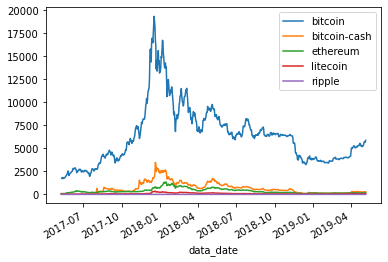

In [20]:
# Plot data_priceUsd for each crypto across time
single_group = rounded_crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(legend=True)
single_group